# Sensor Data - Model for Conversion Prediction and Insights

## Main tasks

1. Load data, Define Features and Target    
    - 1.1 Load data    
    - 1.2 Define Features and Target    
2. Split train-test data, and define model realted functions    
    - 2.1 Train-test split the data  
    - 2.2 Define model related functions  
3. Models comparison and reasoning  
    - 3.1 Logistic Regression  
    - 3.2 Random Forest  
    - 3.3 Gradient Boosting Trees  
    - 3.4 Random Forest with bootstraps for imbalance dataset
4. HyperParameter Tuning with Grid Search   
    - 4.1 Random Forest HyperParameter Tuning with Grid Search  
5. Explore features importance to get insights  
    - 5.1 Top 10 features analysis  
    - 5.2 Insights  
    - 5.3 Next step

## 1. Load data, Define Features and Target
- 1.1 Load data    
- 1.2 Define Features and Target

### 1.1 Load data

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

In [65]:
# Load data from file
df = pd.read_csv('../data/df_model_final.csv')

In [66]:
# Browse dataset
df.head(5)

,index_page_total_stayTime,demo_page_total_stayTime,about_page_total_stayTime,courses_page_total_stayTime,courses_play_page_total_stayTime,click_counts,pages_viewed_counts,is_first_time,weekend,latest_referrer_host_bin_baidu,...,browser_bin_others,city_bin_Beijing,city_bin_Guangzhou,city_bin_Shanghai,city_bin_Shenzhen,city_bin_others,model_bin_mac,model_bin_others,model_bin_pc,sign_up
0,0.000,0.0,0.0,0.000,0.0,1.0,0.0,0.0,0.0,1,...,1,0,0,0,0,1,0,1,0,1.0
1,921.142,0.0,0.0,0.000,0.0,0.0,1.0,0.0,1.0,1,...,0,1,0,0,0,0,1,0,0,0.0
2,10.384,0.0,0.0,1.812,0.0,6.0,7.0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,1,0.0
3,0.031,0.0,0.0,0.000,0.0,2.0,1.0,0.0,1.0,0,...,1,0,0,1,0,0,0,0,1,0.0
4,0.000,0.0,0.0,0.000,0.0,1.0,0.0,1.0,0.0,0,...,1,1,0,0,0,0,0,1,0,0.0


In [67]:
# rename 'sign_up' as 'label'
df = df.rename(columns = {'sign_up': 'label'})

In [68]:
# Show summary stats
df.describe()

,index_page_total_stayTime,demo_page_total_stayTime,about_page_total_stayTime,courses_page_total_stayTime,courses_play_page_total_stayTime,click_counts,pages_viewed_counts,is_first_time,weekend,latest_referrer_host_bin_baidu,...,browser_bin_others,city_bin_Beijing,city_bin_Guangzhou,city_bin_Shanghai,city_bin_Shenzhen,city_bin_others,model_bin_mac,model_bin_others,model_bin_pc,label
count,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,...,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000
mean,3.987277,3.493332,0.461021,0.729770,0.347667,2.786129,1.408439,0.475231,0.133840,0.517253,...,0.441920,0.222327,0.057824,0.081824,0.063632,0.574394,0.178254,0.208319,0.613427,0.042791
std,41.855481,44.449120,13.670677,22.667984,15.331452,5.026236,2.678286,0.499407,0.340495,0.499724,...,0.496636,0.415827,0.233420,0.274109,0.244106,0.494456,0.382743,0.406124,0.486985,0.202395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.005000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.042000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1749.332000,2918.014000,951.302000,1749.192000,1237.363000,152.000000,74.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.2 Define Features and Target

In [69]:
selected_features = list(df.columns.values)

In [70]:
# features for models except regression model
selected_features.remove('label')
selected_features

['index_page_total_stayTime',
 'demo_page_total_stayTime',
 'about_page_total_stayTime',
 'courses_page_total_stayTime',
 'courses_play_page_total_stayTime',
 'click_counts',
 'pages_viewed_counts',
 'is_first_time',
 'weekend',
 'latest_referrer_host_bin_baidu',
 'latest_referrer_host_bin_others',
 'latest_referrer_host_bin_sensordata',
 'latest_utm_source_bin_baidu',
 'latest_utm_source_bin_others',
 'latest_utm_source_bin_sensordata',
 'browser_bin_chrome',
 'browser_bin_others',
 'city_bin_Beijing',
 'city_bin_Guangzhou',
 'city_bin_Shanghai',
 'city_bin_Shenzhen',
 'city_bin_others',
 'model_bin_mac',
 'model_bin_others',
 'model_bin_pc']

In [71]:
X = df[selected_features]
y = df['label']

In [72]:
X.shape

(11708, 25)

In [73]:
y.value_counts()

0.0    11207
1.0      501
Name: label, dtype: int64

## 2. Split train-test data, and define model realted functions
- 2.1 Train-test split the data  
- 2.2 Define model related functions 

### 2.1 Train-test split the data

In [74]:
# import train test split function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 2.2 Define model related functions

#### Train model using sklearn

In [13]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test, model):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred, model)


#### Calculate the metric scores for the model

In [14]:
# define function to plot the modle performance
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred, model):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves of '+ model)
    plt.legend(loc="lower right")
    plt.show()

In [15]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [16]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

## 3. Models comparison and reasoning 
- 3.1 Logistic Regression  
- 3.2 Random Forest  
- 3.3 Gradient Boosting Trees

### 3.1 Logistic Regression

As feature 'is_first_time' with value 1 did not sign_up, we drop this feature to avoid negative impact of Quasi-complete separation for regression model.

              train      test
metrics                      
AUC        0.891985  0.915643
Accuracy   0.956118  0.959863
Precision  0.415094  0.631579
Recall     0.054726  0.121212
f1-score   0.096703  0.203390


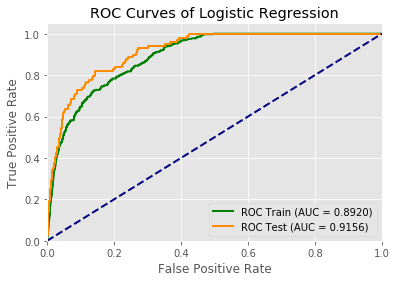

In [203]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression(C=1.0, penalty='l2')
# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test, 'Logistic Regression')

#### AUC of test data is 0.9156 with Logistic Regression, we will try to improve model performance with Random Forest. 

### 3.2 Random Forest

              train      test
metrics                      
AUC        0.972108  0.959114
Accuracy   0.971813  0.966268
Precision  0.852041  0.700000
Recall     0.415423  0.353535
f1-score   0.558528  0.469799


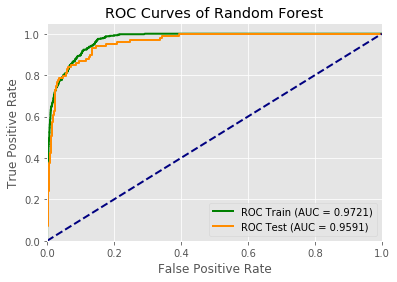

In [204]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Choose some parameter combinations to try
parameters = {'n_estimators': 100,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 20,
              'min_samples_split': 2,
              'min_samples_leaf': 20,
              'random_state': 0,
              'n_jobs': -1
              }

clf_rf = RandomForestClassifier(**parameters)

# Fit a model by providing X and y from training set
clf_rf.fit(X_train, y_train)

# Train test model
train_test_model(clf_rf, X_train, y_train, X_test, y_test, 'Random Forest')

#### AUC of test data is 0.9591 with Random Forest, better than that of Logistic Regression with 0.9156,  because there are feature interaction and non-linearity relationship between features and target in our data set, trees algorithms can deal with these problems while logistic regression cannot.

#### We will try to further improve model performance with Gradient Boosting Trees, because in general, Gradient Boosting Trees can perform better than Random Forest, because it additionally tries to find optimal linear combination of trees (assume final model is the weighted sum of predictions of individual trees) in relation to given train data. This extra tuning may lead to more predictive power.

### 3.3 Gradient Boosting Trees

              train      test
metrics                      
AUC        0.985780  0.958578
Accuracy   0.989537  0.965414
Precision  0.957831  0.615385
Recall     0.791045  0.484848
f1-score   0.866485  0.542373


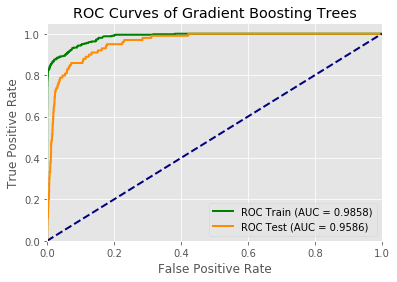

In [205]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier

# Choose some parameter combinations to try
# parameters = {
#     'n_estimators': 100,
#     'max_depth': 5,
#     'learning_rate': 0.1,
#     'random_state': 42
# }

parameters = {
    'n_estimators': 200,
    'max_depth': 3,
    'learning_rate': 0.2,
    'subsample': 0.8,
    'max_features':0.7,
    'random_state': 42
}

clf = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test, 'Gradient Boosting Trees')

#### AUC of test data is 0.9586 with Gradient Boosting Trees, is close to that of Random Forest with 0.9591, means our Random forest has already performed greatly in this dataset and hard for Gradient Boosting Trees to perform better. 
### Thus, we choose Random Forest as our preferred model here. 
#### Then we will try to implement Random Forest with bootstraps for imbalance dataset to check if balance dataset can improve model performance?
### 3.4 Random Forest with bootstraps for imbalance dataset


In [84]:
df_train = X_train.copy()
df_train['target'] = y_train

In [78]:
# Class count
count_class_0, count_class_1 = df_train.target.value_counts()
print(df_train.target.value_counts())

# Divide by class
df_class_0 = df_train[df_train['target'] == 0]
df_class_1 = df_train[df_train['target'] == 1]

0.0    8964
1.0     402
Name: target, dtype: int64


In [79]:
# Random over-sampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_train_over.target.value_counts())

Random over-sampling:
1.0    8964
0.0    8964
Name: target, dtype: int64


In [80]:
y_train_over = df_train_over['target']
X_train_over = df_train_over.drop('target', axis = 1)

              train      test
metrics                      
AUC        0.989517  0.959470
Accuracy   0.950747  0.922289
Precision  0.934416  0.338521
Recall     0.969545  0.878788
f1-score   0.951656  0.488764


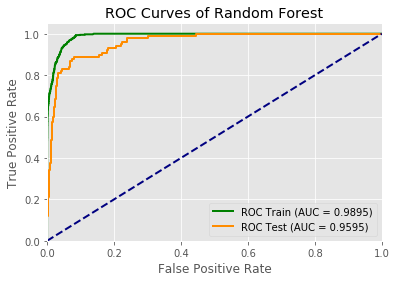

In [83]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Choose some parameter combinations to try
parameters = {'n_estimators': 100,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 20,
              'min_samples_split': 2,
              'min_samples_leaf': 20,
              'random_state': 0,
              'n_jobs': -1
              }

clf_rf = RandomForestClassifier(**parameters)

# Fit a model by providing X and y from training set
clf_rf.fit(X_train, y_train)

# Train test model
train_test_model(clf_rf, X_train_over, y_train_over, X_test, y_test, 'Random Forest')

#### AUC of test data is 0.9595 with 'Random Forest with bootstraps for imbalance dataset', is close to that of Random Forest with the imbalance dataset with 0.9591, means our Random forest has already performed greatly with the imbalance dataset and do not need to balance the dataset.
#### Next, we will try HyperParameter Tuning with Grid Search for Random Forest with the original imbalance dataset, to figure out whether we can do better.

##  4. HyperParameter Tuning with Grid Search
- 4.1 Random Forest HyperParameter Tuning with Grid Search  

### 4.1 Random Forest HyperParameter Tuning with Grid Search

In [213]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [15,20,25], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.995818  0.963762
Accuracy   0.986654  0.966268
Precision  0.982578  0.638889
Recall     0.701493  0.464646
f1-score   0.818578  0.538012


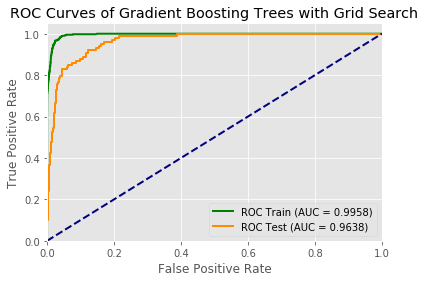

In [214]:
# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test, 'Gradient Boosting Trees with Grid Search')

#### AUC of test data is 0.9638 with Random Forest HyperParameter Tuning with Grid Search, is slightly better than that of previous Random Forest with 0.9591, we select this model to explore the features importance to get some insights

## 5. Explore features importance to get insights
- 5.1 Top 10 features analysis  
- 5.2 Insights  
- 5.3 Next step

### 5.1 Top 10 features analysis

#### The plot below shows the ranked feature importance generated by Random Forest:

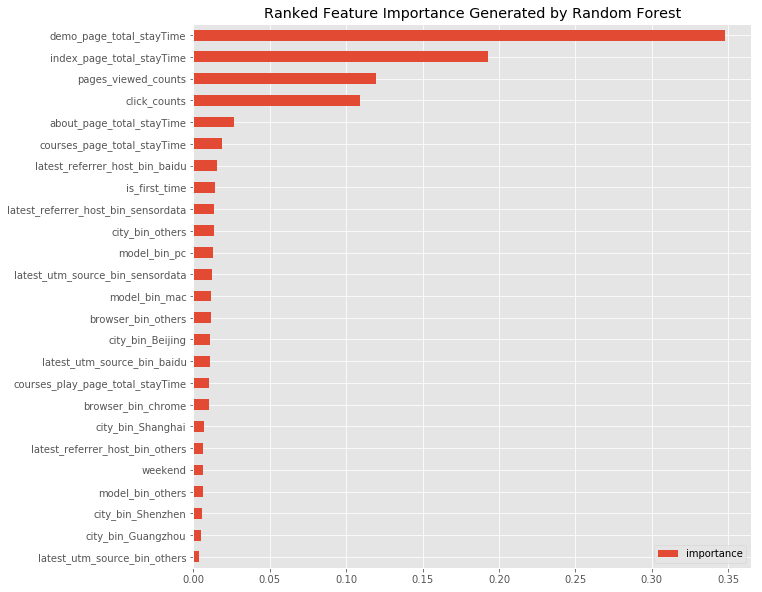

<Figure size 432x288 with 0 Axes>

In [218]:
df_feature_importance = pd.DataFrame()
df_feature_importance['feature'] = selected_features
df_feature_importance['importance'] = clf.feature_importances_
df_feature_importance.sort_values('importance',inplace=True)

ax = df_feature_importance.plot.barh(figsize = (10, 10))
t = np.arange(len(df_feature_importance['feature']))
ax.set_yticks(t)
ax.set_yticklabels(df_feature_importance['feature'])
ax.set_title('Ranked Feature Importance Generated by Random Forest')
plt.show() 

#### As we can see, the top 10 features are:

1. 'demo_page_total_stayTime': the longer time a user spent in ‘demo’ page is, the more likely the user will sign up. And its feature importance is larger than those of 'index_page_total_stayTime', 'about_page_total_stayTime' and courses_page_total_stayTime', which shows user is more likely to visit our 'demo' page than the others.

2. 'index_page_total_stayTime': the same idea with 'demo_page_total_stayTime', and its feature importance is larger than those of 'about_page_total_stayTime' and courses_page_total_stayTime'.

3. 'pages_viewed_counts': the more pages a user views, the more likely the user will sign up.

4. 'click_counts': the more click a user performs, the more likely the user will sign up.

5. 'about_page_total_stayTime': the same idea with 'demo_page_total_stayTime'.

6. 'courses_page_total_stayTime': the same idea with 'demo_page_total_stayTime'.

7. 'latest_referrer_host_bin_baidu': Users referred by 'baidu' are more likely to sign up than users referred by other channels.

8. 'is_first_time': As we notice in the previous 'feature exploration' part, all users with 'is_first_time' value '1' did not sign up, which means highly interested users will come to register another time, we should give users more times to contract with us to make them sign up.

9. 'latest_referrer_host_bin_sensordata': Most of users visit our pages from sensordata website without any 'referrer_host', which means most of campaigns except 'baidu' have no positive effects.

10. 'city_bin_others': the feature importance of 'city_bin_others' is larger than those of other 'city_bin' values, like 'city_bin_Beijing', 'city_bin_Shanghai', which means signup rate may be random among cities.

### 5.2 Insights 

#### a. Funnel Analysis 

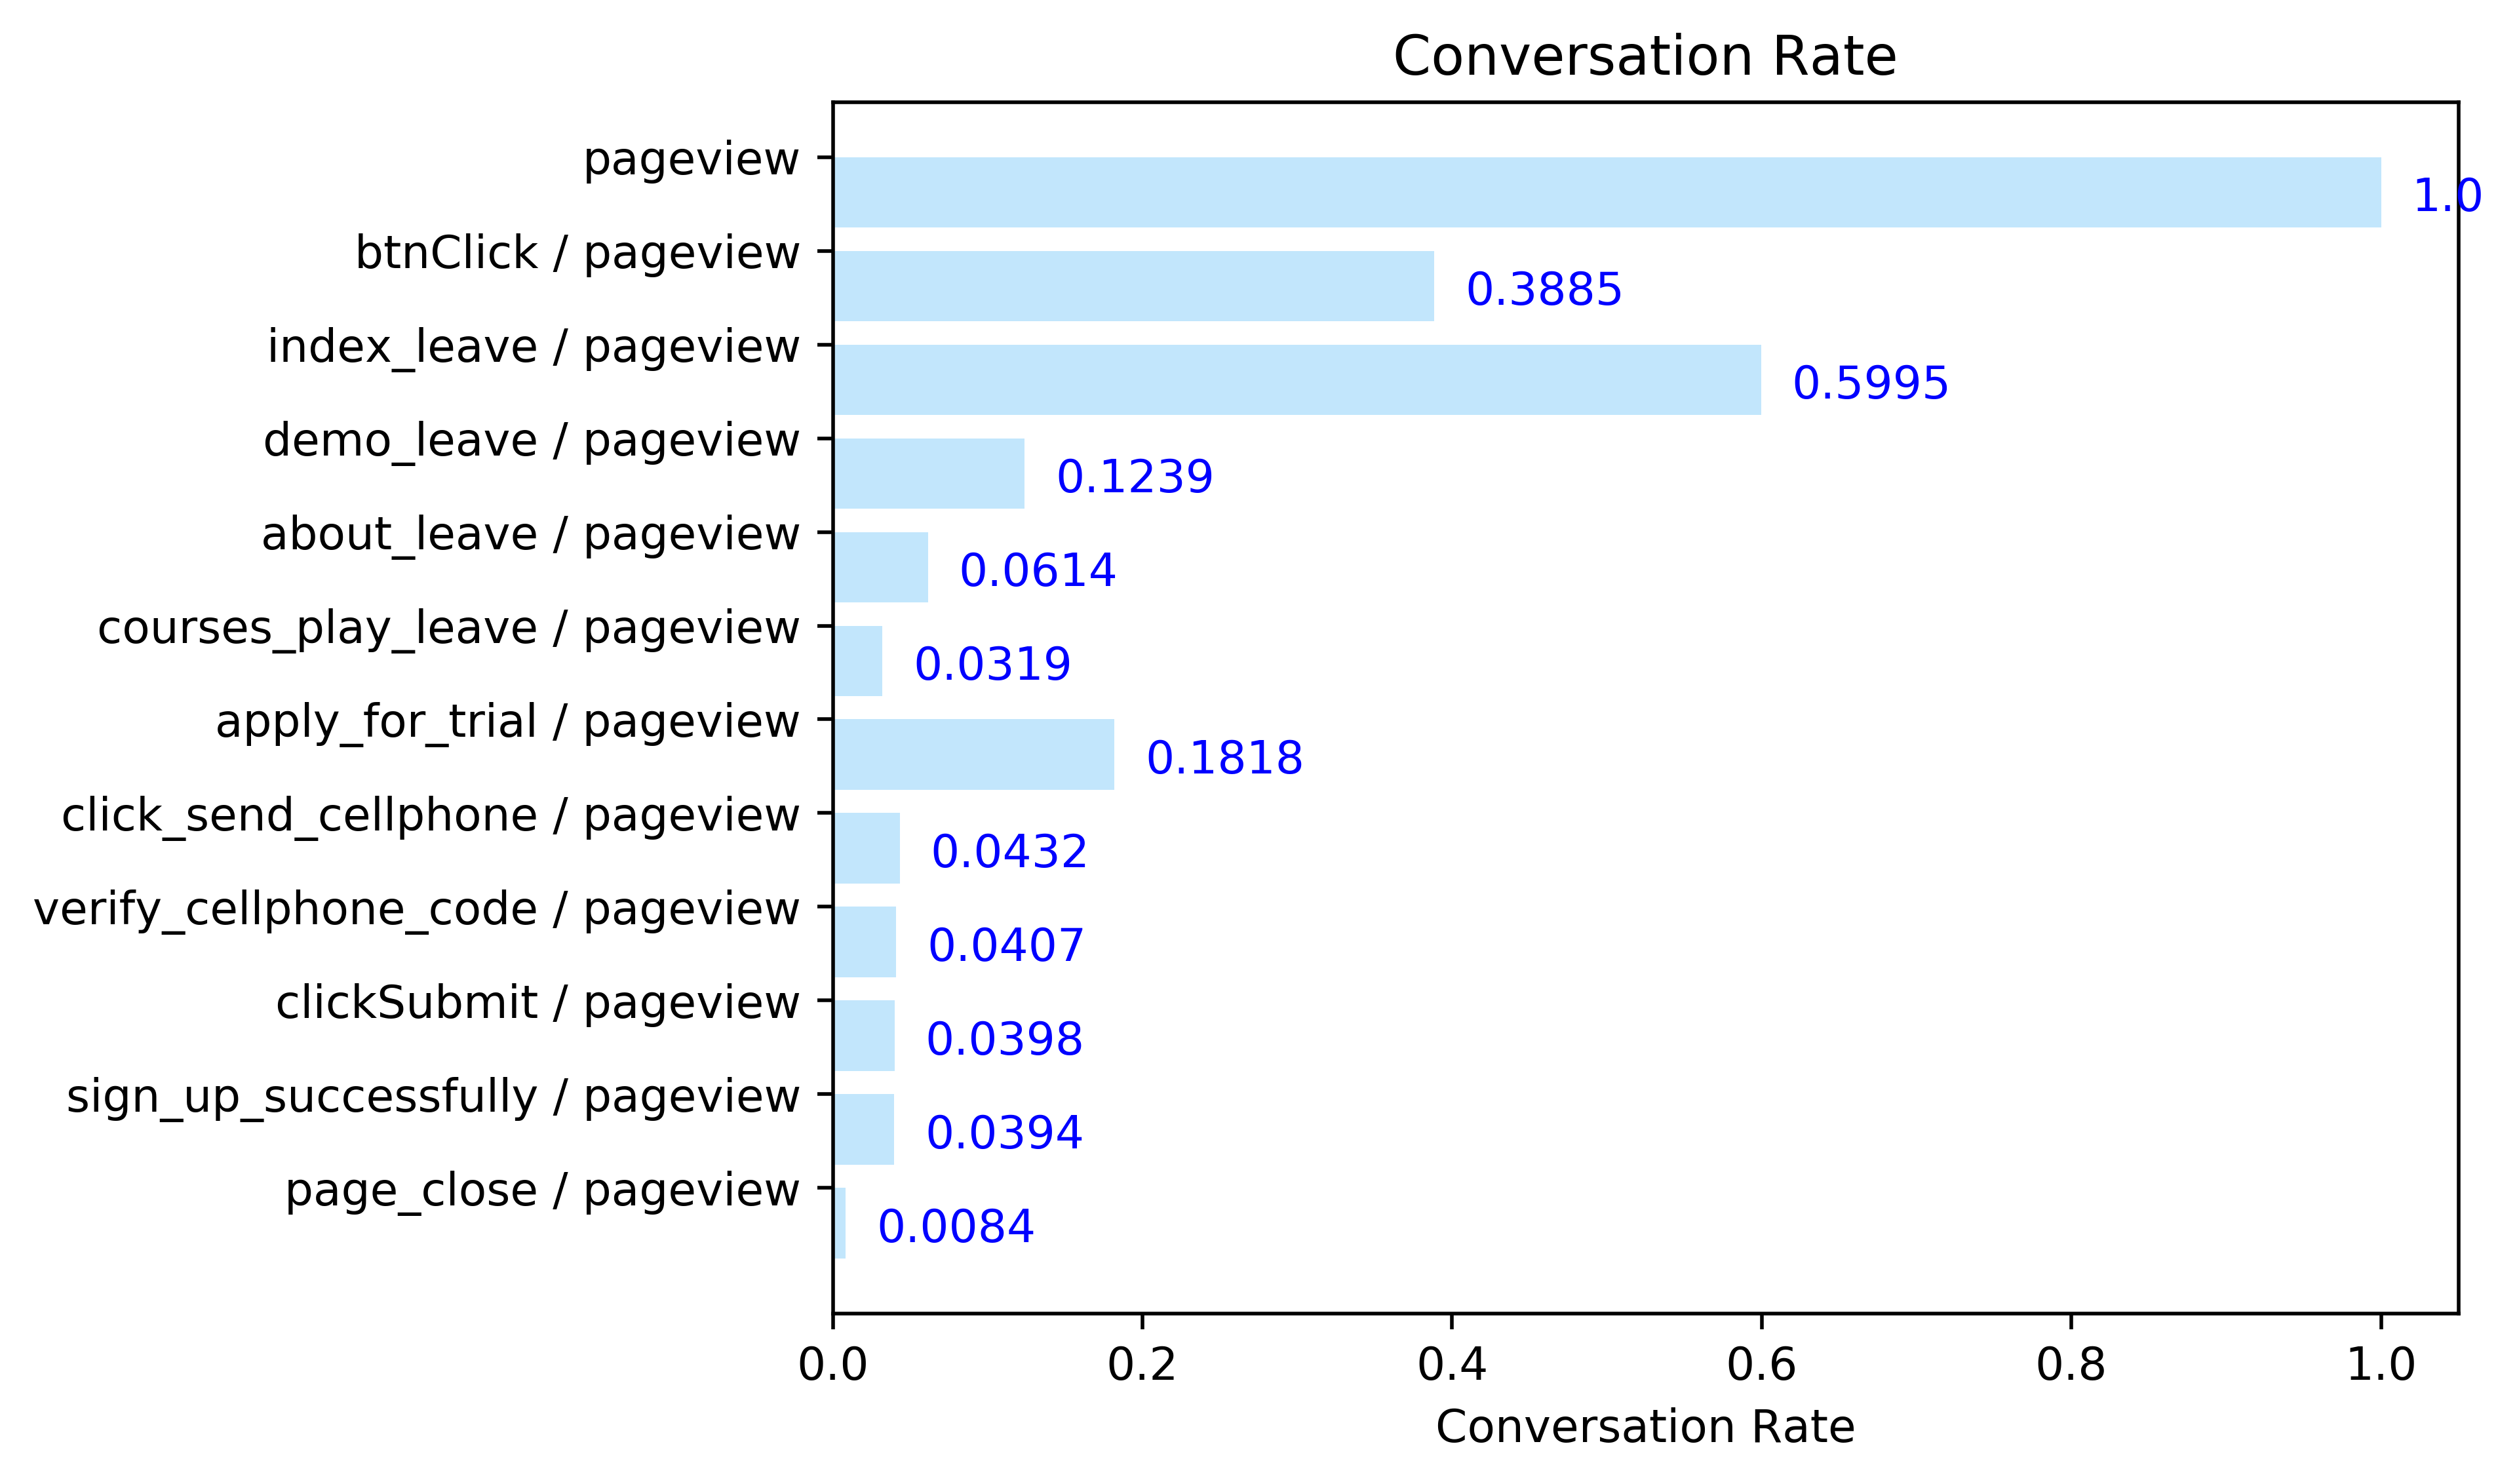

In [209]:
# read image we generated in file '2_data_exploration_and_cleaning, section '2.3.1 event'
from PIL import Image
img = Image.open("conversationrate.png")
img

##### As we mentioned in the previous data exploration section:

- 'button_click_rate' is only 38.85%, most users do not click buttons on pages, perhaps the wording or color of our buttons are not attractive enough.    
- 'apply_for_trial_rate' is only 18.18%, most users do not click 'request' buttons on pages, perhaps our service description is not attractive enough.    
- 'signup_to_apply_for_trial_rate' is only 23.79%, most users who clicked 'request' button at the beginning did not apply when they were asked to provide phone number, perhaps the users care about personal privacy.   
- 'signup_rate' is only 4.32%, most users who viewed the webpage did not attempt to sign up, the same idea with 'apply_for_trial_rate'.
- 'successfully_signup_rate' is 91.22%, we lost nearly 9% of users who attempting to signup, perhaps the efficiency of our sign up process still need to improve.

##### note: 
- Here we define 'signup' with the action 'click_send_cellphone', which means 'dist_id' attemps to sign up an account.
- We define 'signup successfully' with 'isSuccess' property of 'formSubmit' is 'True'.
- We define 'apply_for_trial' with 'name' property of 'btnClick' is 'request'.

#### b. page_stayTime

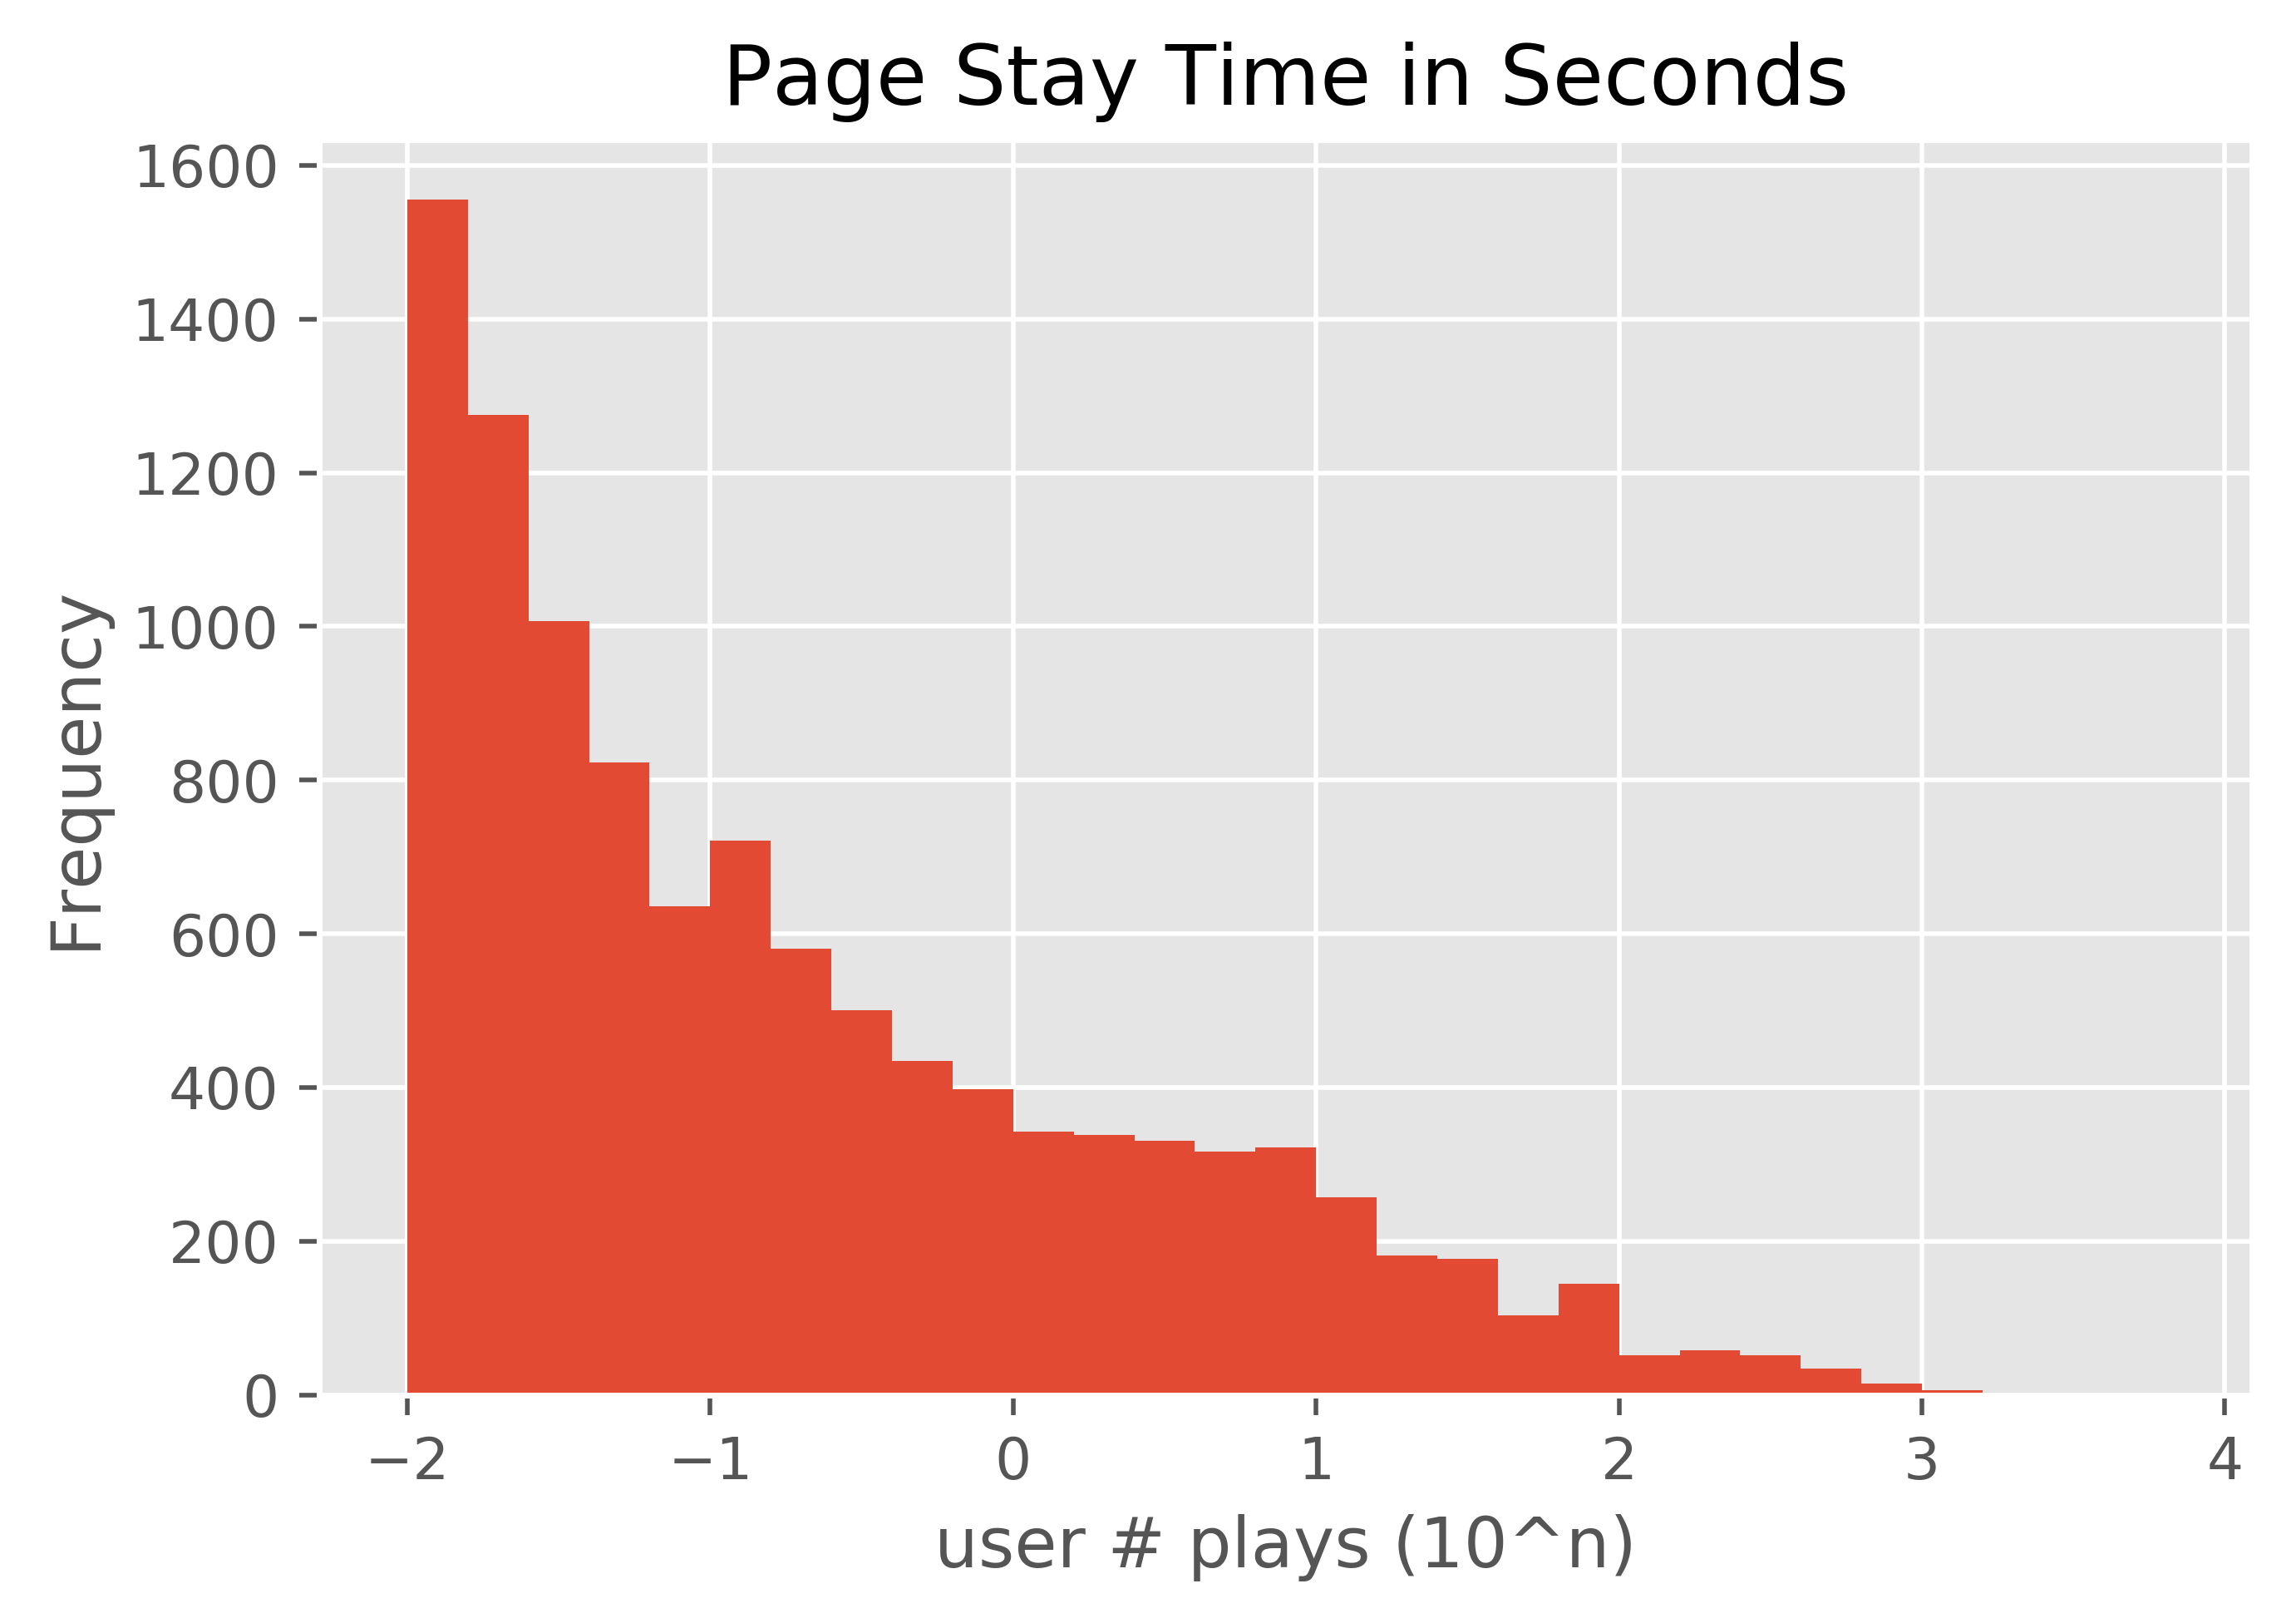

In [210]:
# read image we generated in file '2_data_exploration_and_cleaning, section '2.2.1 page_stayTime'
img = Image.open("page_stayTime.png")
img

##### As we mentioned in the previous data exploration section:

The plot shows that most of user stayed in the page for less than 1 second(10^-1), and the 75 percentile 'page_stayTime' value is 0.226 second, which means most of the users might leave when the page was loading.  
Only 11.41 % of the people who clicked the functional pages stayed more than 3 seconds

#### By analyzing the top 10 features, funnel and page_stayTime, we have some insights:

1. We should improve our page quality, given the high feature importance of 'pages_total_stayTime' and very low percent of users stayed in our pages more than 3 seconds.  
Like: hire web UX designer to improve the layout of our pages, especially 'demo' page and 'index' page, modify the wording or color of our buttons, polish our service description.  

2. We should consider providing other registration options and improve efficiency of our sign up process, given low 'signup_to_apply_for_trial_rate' and low 'successfully_signup_rate'.  
Like: allow users to sign up with e-mail or social network accounts.

3. We should make adjustment to product promotion and campaign strategy, given most our campaigns have no significant effect.  
##### Note: as we don't know the current product promotion and campaign strategy of sensordata, we analyze two different scenarios as below:  
1/ if sensordata had already invested lots of money to product promotion and campaign, it should adjust the investment allocation and invest more budget in 'Baidu', which has relatively better performance than the medias.  
2/ if sensordata did not invest much product promotion and campaign before, it should allocate more budget in this area, 'baidu', '36kr', 'sogou' and 'google' would be good choices, especially 'baidu' which contributed times of referred users than the other hosts. 

### 5.3 Next step

#### Besides the insights mentioned above, I think there are aspects we can further dive deep, like:

1. Detailed analysis on different medium and campaign contributions, try to figure out which channels to invest and how to allocate the budgets.

2. Detailed analysis on user behavior on specific pages, try to figure out which part of the page users pay most attention to, improve the content of interest and redesign the sections that are not valued.

3. It’s also important to track performance over time. If we have more data, we can see whether we’re improving or not, by comparing funnels for each month.